# RESHAPING DATA

Bu dosya içerisinde kullandığımız işlevler ve tutorial linkleri: 

+ pandas.DataFrame.transpose() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

+ pandas.melt() = https://pandas.pydata.org/docs/reference/api/pandas.melt.html

+ pandas.wide_to_long() = https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html

+ pandas.DataFrame.pivot() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

+ pandas.pivot_table() = https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Kullanacağımız verileri içe aktaralım: 

In [1]:
import pandas as pd 

fifa_longformat = pd.read_csv("fifa_longformat.csv")
fifa_wideformat = pd.read_csv("fifa_wideformat.csv")
duplicate_fifa = pd.read_csv("fifa_longformat_with_duplicate.csv")
books_gothic = pd.read_csv("books_gothic.csv")
golden_age = pd.read_csv("golden_age.csv")
str_books = pd.read_csv("str_books.csv")

Çıktılarımızı birbirinden ayırmamızı sağlayacak bir işlev yazalım. 

In [2]:
def ayrac():
    print("\n*****\n")

İçe aktardığımız verilere bir göz atalım. 

In [3]:
print(fifa_longformat)
ayrac()
print(fifa_wideformat)
ayrac()
print(duplicate_fifa)
ayrac()
print(books_gothic)
ayrac()
print(golden_age)
ayrac()
print(str_books)

                name   movement  overall  attacking
0            L.Messi   shooting       92         70
1  Cristiano Ronaldo   shooting       93         89
2            L.Messi    passing       92         92
3  Cristiano Ronaldo    passing       82         83
4            L.Messi  dribbling       96         88
5  Cristiano Ronaldo  dribbling       89         84

*****

                name  age  height  weight nationality                 club
0       Lionel Messi   32     170      72   Argentina            Barcelona
1  Cristiano Ronaldo   34     187      83    Portugal    Manchester United
2    Neymar da Silva   27     175      68      Brazil  Paris Saint-Germain
3          Jan Oblak   26     188      87    Slovenia      Atletico Madrid
4        Eden Hazard   28     175      74     Belgium          Real Madrid

*****

  first name last name   movement  overall  attacking
0     Lionel     Messi   shooting       92         70
1  Cristiano   Ronaldo   shooting       93         89
2     Li

## Introduction to Data Reshaping

+ Wide and long data formats (Geniş ve uzun veri formatları)
+ Reshaping using pivot method (Pivot yöntemi kullanarak yeniden şekillendirme)
+ Pivot tables (Pivot tabloları)

**Reshaping Data**

Bir veri yapısını analizimiz için ayarlamak üzere dönüştürmektir. Yani kısacası, verileri **wide -> long** formata ya da **long -> wide** formata dönüştürmek olarak tanımlayabiliriz. Bu işlemleri sütunları satırlara ya da satırları sütunlara dönüştürmek gibi işlemlerle yapabiliriz.. 

### < Wide and Long Data Formats > 

İlk olarak **Shape** kavramını anlamamız lazım. Shape (şekil), veri kümesinin satırlar ve sütunlar halinde düzenlenme biçimini ifade eder.

**Wide Format (Geniş format)**

her sütunda ayrı bir özelliğin bulunduğu, 

her satırda aynı veriye ait özelliklerin bulunduğu,

tekrarlanan verinin olmadığı (ancak bu missing value'ye yol açabilir) bir format çeşididir. 

Bu format, ortalamayı hesaplamak ya da missing value'ları yüklemek gibi basit istatistikler yapmak için tercih edilir.

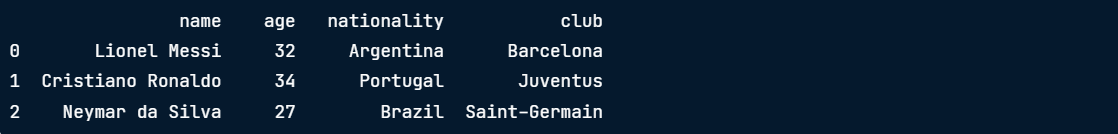

Böyle bir formatta, her oyuncunun özelliği bizi ilgilendirir.

**Long Format (Uzun format)**

her satırın bir veri için yalnızca bir özelliği gösterdiği, 

tekrarlanan verilerin olabildiği bir format çeşididir.

Bu format, verileri daha iyi özetleyebilen bir yapıya sahip olduğu için, analiz ve grafikleştirmede tercih edilir. Temiz bir veri kümesini depolamak için en uygun biçimdir. 

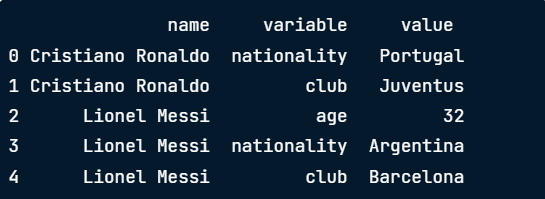

Böyle bir formatta, bir oyuncunun her özelliği bizi ilgilendirir. 

Aşağıdaki kod bloğunda, fifa_wideformat veri setinde **name** sütununu **pd.set_index()** işlevi ile satır haline getirelim, sadece **height** ve **weight** sütunlarının olduğu yeni dataframe'i **fifa** adlı değişkene atayalım. Ardından **fifa** dataframe'inin transpozu alınmış halini yani, satırlar sütun, sütunlar satır olmuş halini **pd.transpose()** işlevi ile gerçekleştirip **fifa_transpose** değişkinine atayalım.

In [4]:
#1
fifa = fifa_wideformat.set_index("name")[["height", "weight"]]
print(fifa)
ayrac()

#2
fifa_transpose = fifa.transpose()
print(fifa_transpose)

                   height  weight
name                             
Lionel Messi          170      72
Cristiano Ronaldo     187      83
Neymar da Silva       175      68
Jan Oblak             188      87
Eden Hazard           175      74

*****

name    Lionel Messi  Cristiano Ronaldo  Neymar da Silva  Jan Oblak  \
height           170                187              175        188   
weight            72                 83               68         87   

name    Eden Hazard  
height          175  
weight           74  


### < Reshaping Using Pivot Method >

**Long Formattan Wide Formata Yeniden Şekillendirme**

Sütunlar arasındaki ilişkiyi göstermek veya zaman serileri yapmak için veya sütunların benzersiz değişken olmasını gerektiren herhangi bir durumda, eğer veri setimiz long format ise long formattan, wide formata yeniden şekillendirme yaparız. Çünkü bu durumlar, veri setimiz wide format ise gerçekleştirilebilir.

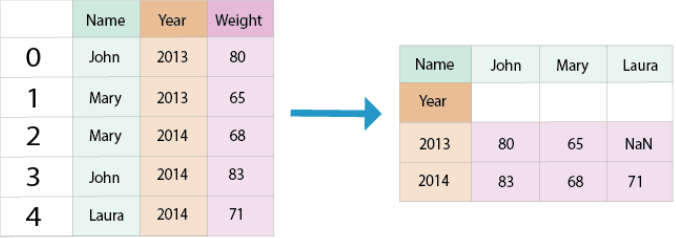

**pd.pivot()** işlevi, verileri long formattan, wide formata yeniden şekillendirmemizi sağlar. **index, columns, values** parametreleri sırayla;

**index :** satıra dönüştürmek istediğimiz sütunu alır

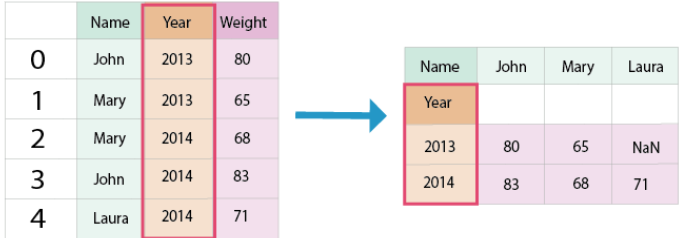

**columns :** sütuna dönüştürmek istediğimiz satırı alır

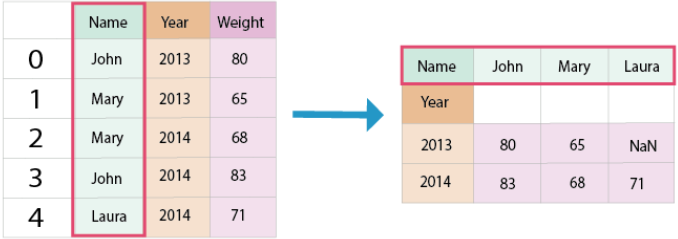

**values :** yeni oluşturulacak dataframe'i doldurmak istediğimiz değerleri alır

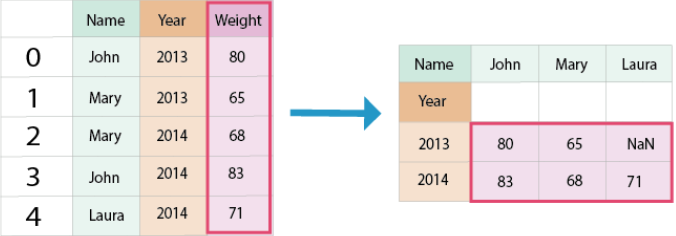

Eğer eşleşen bir değer bulmazsa **NaN** döndürür.

Aşağıdaki kod bloğunda, fifa_longformat veri setinde **pd.pivot** işlevini **name, overall ve movement** sütunlarında uygulayalım.

In [5]:
#1
fifa_overall = fifa_longformat.pivot(index = "name", columns = "movement", values = "overall")
print(fifa_overall)
ayrac()

#2
fifa_attacking = fifa_longformat.pivot(index = "name", columns = "movement", values = "attacking")
print(fifa_attacking)
ayrac()

#3 
fifa_names = fifa_longformat.pivot(index = "movement", columns = "name", values = "overall")
print(fifa_names)
ayrac()

#4
fifa_ov_at = fifa_longformat.pivot(index = "name", columns = "movement")
print(fifa_ov_at)

movement           dribbling  passing  shooting
name                                           
Cristiano Ronaldo         89       82        93
L.Messi                   96       92        92

*****

movement           dribbling  passing  shooting
name                                           
Cristiano Ronaldo         84       83        89
L.Messi                   88       92        70

*****

name       Cristiano Ronaldo  L.Messi
movement                             
dribbling                 89       96
passing                   82       92
shooting                  93       92

*****

                    overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        89      82       93        84      83       89
L.Messi                  96      92       92        88      92       70


+ 1-) **fifa_overall**, oyunculara göre, skillerin, overall (genel) değerlerini tablolaştırdı


+ 2-) **fifa_attacking**, oyunculara göre, skillerin, attacking (ataktaki) değerlerini tablolaştırdı


+ 3-) **fifa_names**, skillere göre, oyuncuların, overall (genel) değerlerini tablolaştırdı


+ 4-) **fifa_ov_at**, oyunculara göre, oyuncuların, overall (genel) ve attacking (ataktaki) değerlerini tablolaştırdı

### < Pivot Tables > 

**pd.pivot()** işlevinin bazı kısıtlamaları vardır. Tekrar eden satırlar olduğu zaman hata verir: 


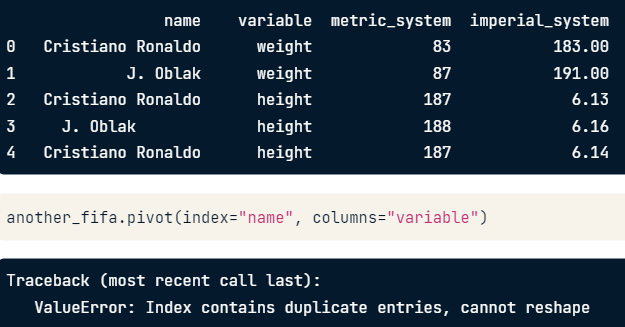

Bu durumun başlıca sebebi, **pd.pivot()** işlevinin değerleri toplayamamasıdır. **pd.pivot()** işlevini kullanacaksak eğer bu durumu çözmek için, tekrar eden satırları bırakmamız gerekir. Ancak Pandas buna başka bir yöntem daha sunar: **pd.pivot_table()**!

**pd.pivot_table()**, daha büyük veri setlerindeki verileri özetleyen istatistikleri içeren bir dataframe'dir. **index, columns, values, aggfunc ve margins** parametreleri vardır. Bunlar:

**index ve columns :**

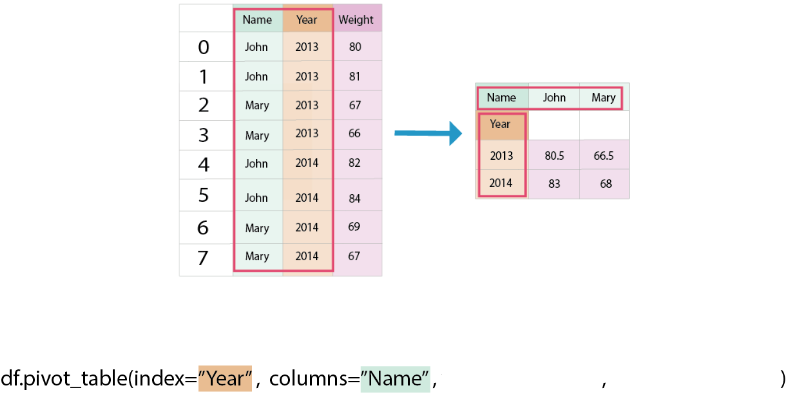

**values ve aggfunc :**

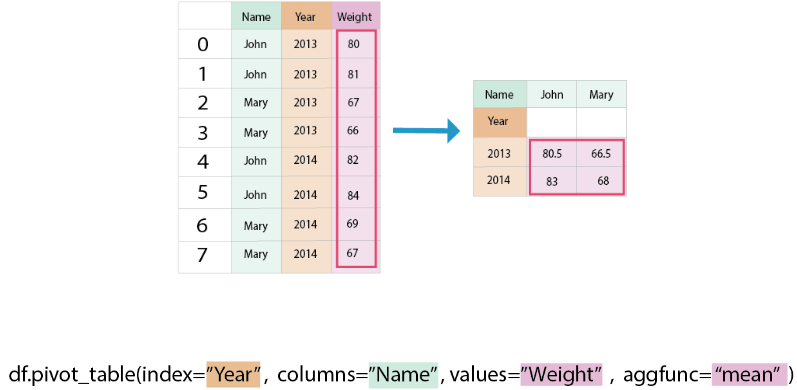

**margins :**

True olarak ayarlandığında, tüm sütunlar ve satırlar yeni dataframe'e eklenir.

**pd.pivot_table()** işlevinin bir başka avantajı, birden çok indexleme yapabilmesidir. Yani satıra dönüştüreceğimiz sütun sayısı, 1'den çok olabilir.

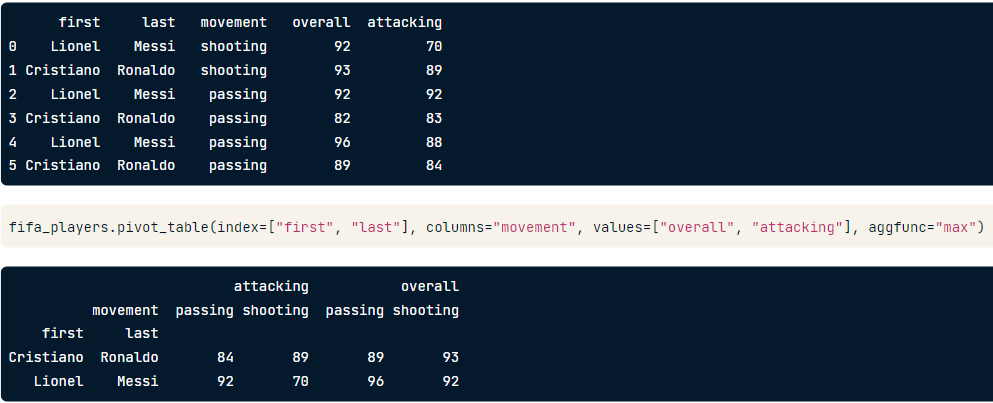

**pd.pivot()** mu yoksa **pd.pivot_table()** mı kullanmalıyız? Eğer: 

+ Dataframe'in her satır/sütun çifti için birden fazla değeri var mı?

+ Oluşturduğumuz yeni dataframe'de birden çok indexe ihtiyaç var mı?

+ Büyük dataframe'imiz için özet istatistiklere ihtiyacımız var mı?

Eğer bu sorulardan herhangi birine ''evet'' yanıtını veriyorsak, **pd.pivot_table()** kullanmalıyız. 

Duplicate (tekrar eden satır) içeren long formattaki fifa veri setini içe aktaralım ve yapılan işlemlerde hata oluşmaması için **pd.drop()** işlevi ile tekrar eden satırı bırakalım. Ardından bu veri seti üzerinde **pd.pivot** işlevini kullanalım. Daha sonra, **pd.drop()** işlevini kullanmadan, buna gerek duymadan **pd.pivot_table()** işlevini bu veri seti üzerinde uygulayalım.

In [6]:
duplicate_fifa = pd.read_csv("fifa_longformat_with_duplicate.csv")
print(duplicate_fifa)
ayrac()

#1
fifa_drop = duplicate_fifa.drop(4, axis = 0)
fifa_pivot = fifa_drop.pivot(index = "last name", columns = "movement")
print(fifa_pivot)
ayrac()

#2
fifa_pivot_table_with_last_name = duplicate_fifa.pivot_table(index = "last name",
                                                             columns = "movement",
                                                             aggfunc = "mean")
print(fifa_pivot_table_with_last_name)
ayrac()

#3
fifa_pivot_table_both_names = duplicate_fifa.pivot_table(index = ["first name", "last name"],
                                                        columns = "movement", 
                                                        aggfunc = "mean")
print(fifa_pivot_table_both_names)
ayrac()

#4
print(duplicate_fifa.pivot_table(index = ["first name", "last name"],
                                values = ["overall", "attacking"],
                                aggfunc = "max"))
ayrac()

#5
print(duplicate_fifa.pivot_table(index = ["first name", "last name"],
                                columns = "movement",
                                aggfunc = "count",
                                margins = True))

  first name last name   movement  overall  attacking
0     Lionel     Messi   shooting       92         70
1  Cristiano   Ronaldo   shooting       93         89
2     Lionel     Messi    passing       92         92
3  Cristiano   Ronaldo    passing       82         83
4     Lionel     Messi  dribbling       96         88
5  Cristiano   Ronaldo  dribbling       89         84
6     Lionel     Messi  dribbling       88         97

*****

          first name                         overall                   \
movement   dribbling    passing   shooting dribbling passing shooting   
last name                                                               
Messi         Lionel     Lionel     Lionel        88      92       92   
Ronaldo    Cristiano  Cristiano  Cristiano        89      82       93   

          attacking                   
movement  dribbling passing shooting  
last name                             
Messi            97      92       70  
Ronaldo          84      83       89  

+ 1-) **fifa_drop**, duplicate_fifa'daki 5. satırın **pd.drop()** işlevi ile bırakılmış halidir. **fifa_pivot** ise oyunculara göre, movement değerlerinin tablolaştırılmış halidir.


+ 2-) **fifa_pivot_table_with_last_name**, tekrar eden satırın bırakılmasına gerek duyulmadan, oyunculara göre, movement değerlerinin ortalamasının tablolaştırılmış halidir.


+ 3-) **fifa_pivot_table_both_names**, oyuncuların ilk ve son adlarına göre, movement değerlerinin ortalamasının tablolaştırılmış halidir.


+ 4-) oyuncuların ilk ve son adlarına göre, ayrı ayrı attacking ve overall değerlerinin tablolaştırılmış halidir.


+ 5-) oyuncuların ilk ve son adlarına göre, bütün sütunların tablolaştırılmış halidir. 

## Converting Between Wide and Long Format (Geniş ve Uzun Format Arasında Dönüştürme)

+ Reshaping with melt (Melt ile yeniden şekillendirme)
+ Wide to long function (Geniş formattan uzun formata)
+ Working with string columns (Metin sütunlarıyla çalışma)

### < Reshaping with Melt > 

**Wide Formattan Long Formata Yeniden Şekillendirme :**

Verileri analiz etmek ya da farklı değişkenleri aynı grafikte çizdirmek istediğimiz durumlarda eğer veri setimiz wide formatta ise long formata yeniden şekillendirme yaparız. Çünkü bu durumlar, long formattaki bir veri seti ile yapılabilir.

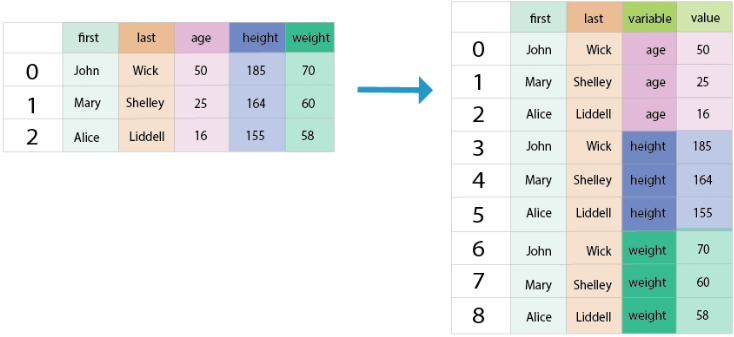

**pd.melt()** işlevi verileri, wide formattan long formata şekillendirmemizi sağlar. Bu işlev, belirli sütunların toplanması gerektiği durumlarda kullanışlıdır. Örneğin, bir veri çerçevesinde birçok sütun varsa ve bu sütunların değerleri arasındaki ilişkiyi daha iyi anlamak için sütunları tek bir sütun altında birleştirmek istiyorsak kullanabiliriz. **id_vars**,  **value_vars**, **var_name** ve **value_name** adlı parametreleri vardır. Bunlar sırayla: 

**id_vars :** Bir veya daha fazla sabit sütun belirterek sütun adlarını birleştirmek için kullanılır. Yani tanımlayıcı değişkenler olarak kullanılacak olan sütunların adlarını alır. 

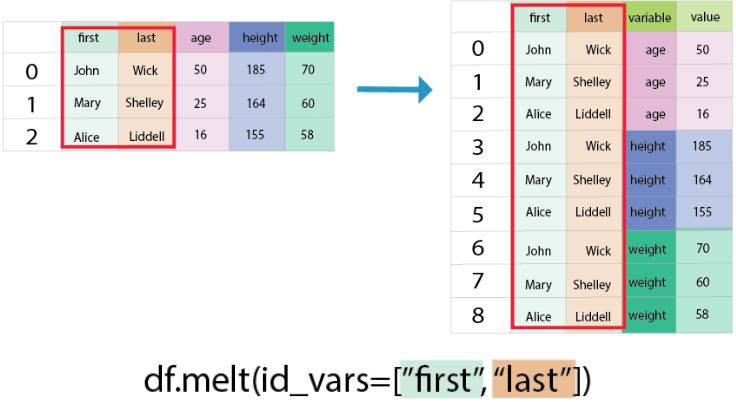

**value_vars :**  Sütunları toplar ve bunları yeni bir "variable" sütunu altında birleştirir. "value_vars" parametresi belirtilmezse, tüm sütunlar "variable" ve "value" sütunlarına dönüştürülür.

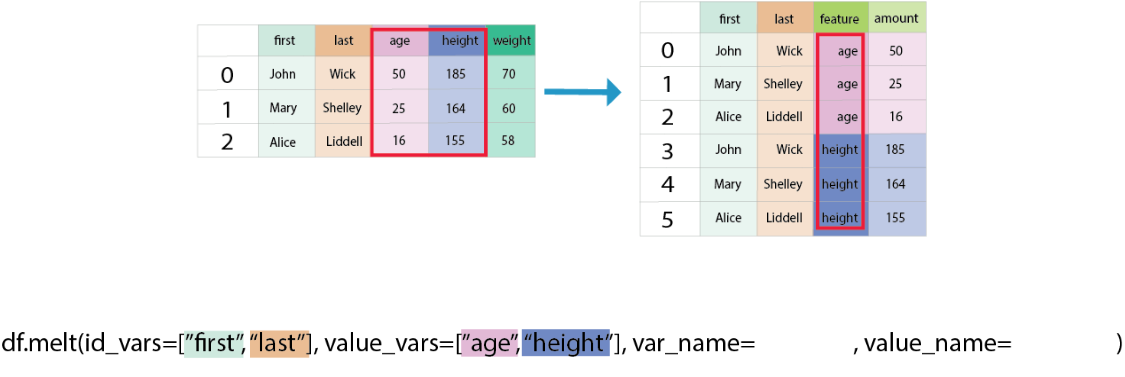

**var_name :** Değişken (variable) sütununun adını değiştemeye yarar.

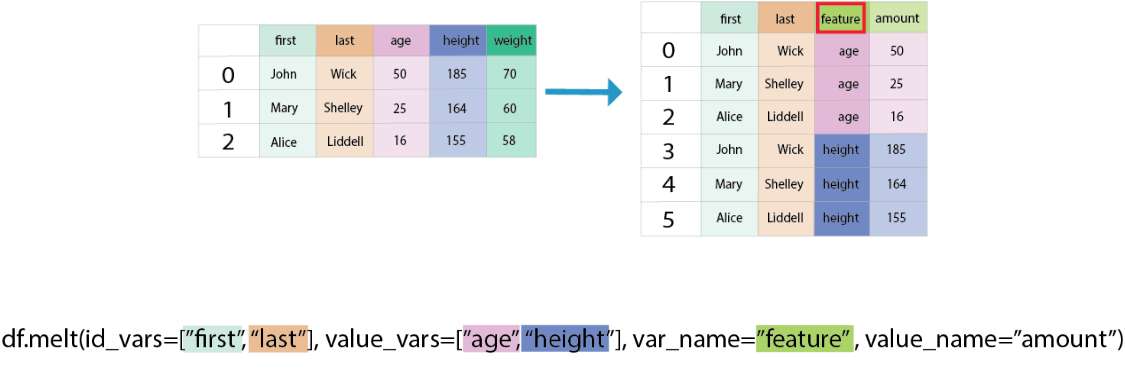

**value_name :** Value sütununun adını değiştirmeye yarar. 

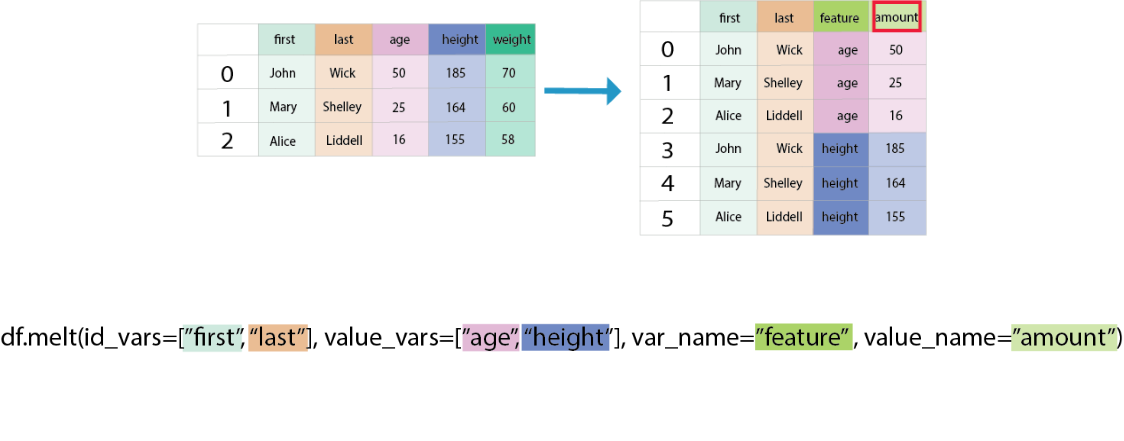

Aşağıdaki kod bloğunda, books_gothic adlı wide formattaki veri setini **pd.melt()** ile long formata dönüştürelim.   

In [7]:
books_gothic = pd.read_csv("books_gothic.csv")
print(books_gothic)
ayrac()

#1
gothic_melted = books_gothic.melt(id_vars = "title")
print(gothic_melted)
ayrac()

#2
gothic_melted_2 = books_gothic.melt(id_vars = ["title", "authors", "publisher"])
print(gothic_melted_2)
ayrac()

#3
publisher_melted = books_gothic.melt(id_vars = ["title", "authors"],
                                    value_vars = "publisher")
print(publisher_melted)
ayrac()

#4
rating_melted = books_gothic.melt(id_vars = "title", 
                                  value_vars = ["rating", "rating_count"])
print(rating_melted)
ayrac()

#5
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name='feature', 
                                  value_name="number")
print(books_ratings)

                        title       authors  num_pages  rating_count  rating  \
0           Wuthering Heights  Emily Bronte        322          2155    3.85   
1                Frankenstein  Mary Shelley        189          2452    4.31   
2  The Picture of Dorian Gray   Oscar Wilde        187          3342    4.15   

           publisher  
0      Penguin Books  
1  Kaplan Publishing  
2            Pearson  

*****

                         title      variable              value
0            Wuthering Heights       authors       Emily Bronte
1                 Frankenstein       authors       Mary Shelley
2   The Picture of Dorian Gray       authors        Oscar Wilde
3            Wuthering Heights     num_pages                322
4                 Frankenstein     num_pages                189
5   The Picture of Dorian Gray     num_pages                187
6            Wuthering Heights  rating_count               2155
7                 Frankenstein  rating_count               2452
8  

+ 1-) **title** sütunundaki verilere göre, diğer sütunlardaki verileri tablolaştırdı.


+ 2-) **title, authors, publisher** sütunundaki verilere göre, diğer sütunlardaki verileri tablolaştırdı.


+ 3-) **title ve authors** sütunundaki verilere göre, **publisher** sütunundaki verileri tablolaştırdı.


+ 4-) **title** sütunundaki verilere göre, **rating ve rating_count** sütunundaki verileri tablolaştırdı.


+ 5-) **title, authors, publisher** sütunundaki verilere göre, **rating ve rating_count** sütunundaki verileri tablolaştırdı. **rating ve rating_count** sütunlarının isimlerinin olduğu sütuna **feature**, değerlerinin olduğu sütuna da **number** adı verildi.

### < Wide to Long Function > 

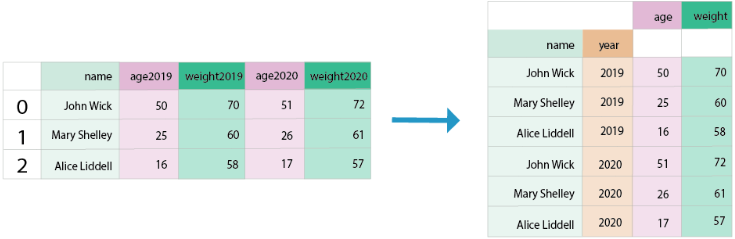

Yukarıdaki gibi bir wide -> long yeniden şekillendirmesini **pd.melt()** işlevi ile yapamayız çünkü wide formattaki veri setinde **year** diye bir sütun yok. Bunun gibi durumlarda **pd.wide_to_long** işlevini kullanılırız. Genellikle bir veri çerçevesindeki sütunlar arasındaki ilişkiyi anlamak için kullanılır. Örneğin, bir veri çerçevesinde birkaç sütun varsa ve bu sütunların her biri belirli bir kategoriyi temsil ediyorsa, wide_to_long() işlevini kullanarak bu sütunları tek bir kategorik sütun altında birleştirebiliriz. Bu işlev, **df, stubnames, i ve j** parametreleri alır. Bu parametreler sırayla: 

**df :** Birkaç kategoriden oluşan ve tek bir kategorik sütuna dönüştürülecek olan dataframe'i gireriz.

**stubnames :** Belirli bir ön adı içeren sütunların seçilmesini sağlar. Sütunların adlarının başladığı öneki belirtebiliriz. 

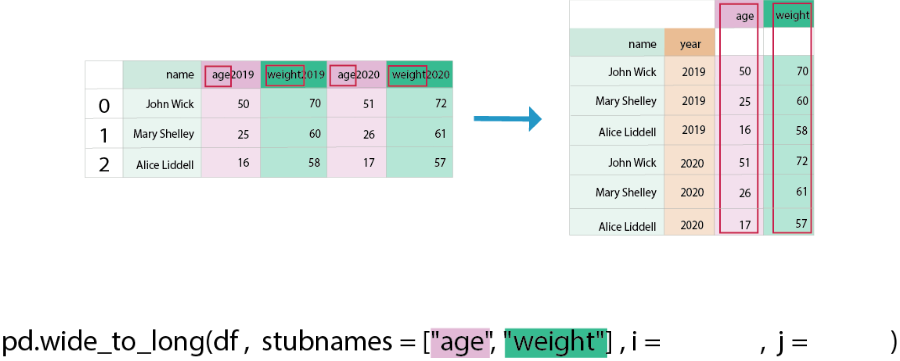

**j :** Geniş sütunların son ekini veya sonunu içeren sütunu nasıl adlandırmak istediğimizi gireriz. Sütun adları birleştirilir.

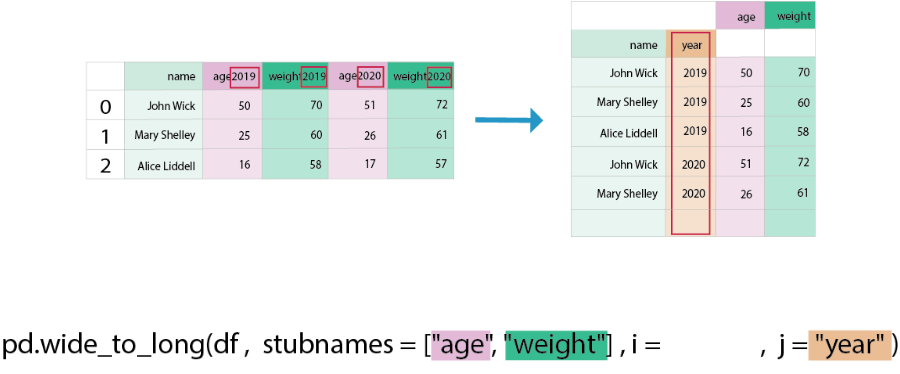

**i :** Sabit sütunlar belirtilir. 

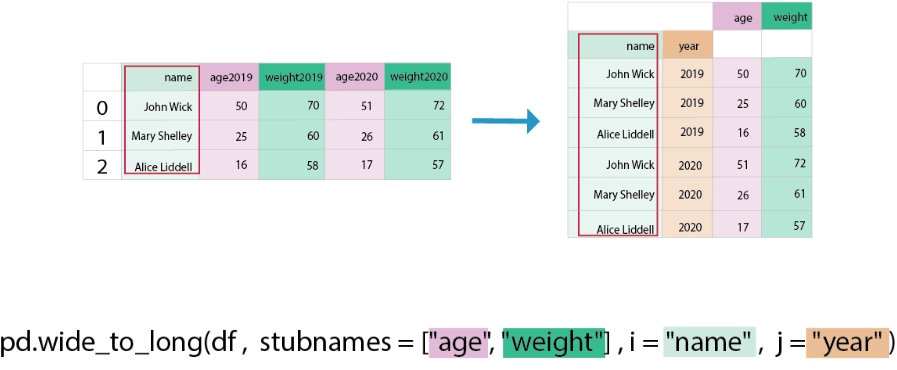

Aşağıdaki kod bloğunda, golden_age adlı veri setinde **pd.wide_to_long()** işlevini uygulayalım.

In [8]:
golden_age = pd.read_csv("golden_age.csv")
print(golden_age)
ayrac()

golden_age = golden_age.dropna()
print(golden_age)
ayrac()

#1
isbn_long = pd.wide_to_long(golden_age, stubnames = ["isbn"],
                           i = "title",
                           j = "version")
print(isbn_long)
ayrac()

#2
prefix_long = pd.wide_to_long(golden_age, stubnames = "prefix",
                             i = ["title", "authors"],
                             j = "version")
print(prefix_long)
ayrac()

#3
all_long = pd.wide_to_long(golden_age, stubnames = ["isbn", "prefix"],
                          i = ["title", "authors"],
                          j = "version")
print(all_long)

               title              authors      isbn13        isbn10  prefix13  \
0   The Great Gatsby  F. Scott Fitzgerald  97800600.0  1.572703e+09     978.0   
1  The Short Stories     Ernest Hemingway  97806848.0  6.848379e+08     978.0   
2  To the Lighthouse       Virginia Woolf  97801560.0  1.560305e+08     978.0   
3                NaN                  NaN         NaN           NaN       NaN   

   prefix10  
0       1.0  
1       0.0  
2       0.0  
3       NaN  

*****

               title              authors      isbn13        isbn10  prefix13  \
0   The Great Gatsby  F. Scott Fitzgerald  97800600.0  1.572703e+09     978.0   
1  The Short Stories     Ernest Hemingway  97806848.0  6.848379e+08     978.0   
2  To the Lighthouse       Virginia Woolf  97801560.0  1.560305e+08     978.0   

   prefix10  
0       1.0  
1       0.0  
2       0.0  

*****

                           prefix10  prefix13              authors  \
title             version                                

+ Bütün örneklerde; **stubnames** parametresi ile isbn10 ve isbn13 sütunlarını **isbn** aldı tek bir sütunda birleştirdik. **i** parametresi ile title authors sütunlarını benzersiz index olarak ayarladık ve tablolaştırmalar bu sütunlara göre yapıldı. **j** parametresi ile isbn13 ve isbn10 sütunlarının isimlerinde **13 ve 10** eklerini **version** adlı bir sütunda ayrı bir sütun haline getirdik. Böylece isbn 13 olanlar version sütununda 13, isbn10 olanlar verison sütununda 10 olarak göründü. 

### < Working with String Columns > 

Bu başlık altında string sütunlarla uğraşacağız.

Aşağıdaki kod bloğunda, str_books adlı veri setindeki str sütunlarla çalışalım.

In [18]:
str_books = pd.read_csv("str_books.csv")
print(str_books)
ayrac()

print(str_books["title"].dtype)
ayrac()

#1
print(str_books["title"].str.split(":"))
ayrac()

#2
print(str_books["title"].str.split(":").str.get(0))
ayrac()

#3
print(str_books["title"].str.split(":", expand = True))
ayrac()

#4
str_books[["main_title", "subtitle"]] = str_books["title"].str.split(":",
                                                                    expand = True)
print(str_books)
ayrac()

#5
str_books.drop("title", axis = 1, inplace = True)
print(str_books)
ayrac()

#6
new_str_books = pd.wide_to_long(str_books, stubnames = ["ratings", "sold"],
                     i = ["main_title", "subtitle"],
                     j = "year",
                     sep = "_",           
                     suffix = "\w+")
print(new_str_books)

                 title  raitings_2015  sold_2015  raitings_2016  sold_2016
0  The Civil War:Vol.1            4.3        234            4.2        254
1  The Civil War:Vol.2            4.5        525            4.3        515
2  The Civil War:Vol.3            4.1        242            4.2        251

*****

object

*****

0    [The Civil War, Vol.1]
1    [The Civil War, Vol.2]
2    [The Civil War, Vol.3]
Name: title, dtype: object

*****

0    The Civil War
1    The Civil War
2    The Civil War
Name: title, dtype: object

*****

               0      1
0  The Civil War  Vol.1
1  The Civil War  Vol.2
2  The Civil War  Vol.3

*****

                 title  raitings_2015  sold_2015  raitings_2016  sold_2016  \
0  The Civil War:Vol.1            4.3        234            4.2        254   
1  The Civil War:Vol.2            4.5        525            4.3        515   
2  The Civil War:Vol.3            4.1        242            4.2        251   

      main_title subtitle  
0  The Civil War    V

+ 1-) **str.split(":")** ile, split'in içerisindeki işaretten önceki ve sonraki string kısımları ayırmasını sağladık. Bunun sonucunda **title** sütunundaki her bir satırdaki veri için, ":" işaretinden önceki ve sonraki metinler ayrı ayrı listelendi ve ayrı ayrı eleman olarak yazıldı.


+ 2-) **str.get()** işlevi ile her satırın ilk bölünmüş öğesini döndürdük. 


+ 3-) **str.split()** ile bölünmüş her öğe için bir tane olmak üzere, 2 sütunlu yeni bir dataframe döndürdük ve dataframe'in kalıcı olarak değişmesini sağladık. Bunu, **expand = True** parametresi sağladı.


+ 4-) **expand = True** parametresi, bölünmüş öğelerin orijinal dataframe'deki sütunlara atanmasına izin verir. **main_title ve subtitle** adında yeni sütunları, bölünmüş öğelerin olduğu sütun olarak dataframe'e ekledik.


+ 5-) **title** sütunu str.split ile bölünmemiş ve karışık bir halde olduğu için bu sütunu bıraktık ve **inplace = True** parametresi ile dataframe'i kalıcı olarak değiştirdik.